In [908]:
#Import packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor;
from sklearn.metrics import r2_score

In [909]:
bikerent = pd.read_csv('BikeRentalData.csv')
bikerent.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [910]:
bikerent.shape

(730, 16)

In [911]:
bikerent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [912]:
bikerent.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [913]:
#Drop instant column as its only indexing the rows
# Dropping casual and registered as cnt is the target variable, casual and registered is not significant
bikerent.drop(columns=['instant', 'casual', 'registered'], axis=1, inplace=True)

In [914]:
bikerent.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Convert categorical variables season

In [916]:
bikerent.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [917]:
bikerent['season'] = bikerent['season'].map({1:'spring', 2: 'summer', 3: 'fall', 4:'winter'})

In [918]:
bikerent.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

## Convert categorical variables weathersit

In [920]:
bikerent.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [921]:
bikerent['weathersit'] = bikerent['weathersit'].map({1:'Clear', 2: 'Mist', 3: 'Light Snow', 4:'Heavy Rain'})

In [922]:
bikerent.weathersit.value_counts()

weathersit
Clear         463
Mist          246
Light Snow     21
Name: count, dtype: int64

In [923]:
bikerent.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [924]:
#Map weekedays to actual values
bikerent['weekday'] = bikerent['weekday'].map({0:'Tuesday',1:'Wednesday', 2: 'Thursday', 3: 'Friday', 4:'Saturday', 5:'Sunday', 6:'Monday'})

In [925]:
bikerent.weekday.value_counts()

weekday
Monday       105
Tuesday      105
Wednesday    105
Thursday     104
Saturday     104
Sunday       104
Friday       103
Name: count, dtype: int64

In [926]:
bikerent.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [927]:
bikerent['mnth'] = bikerent['mnth'].map({1:'Jan', 2: 'Feb', 
                                         3: 'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul',8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [928]:
bikerent.mnth.value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

## EDA for the data

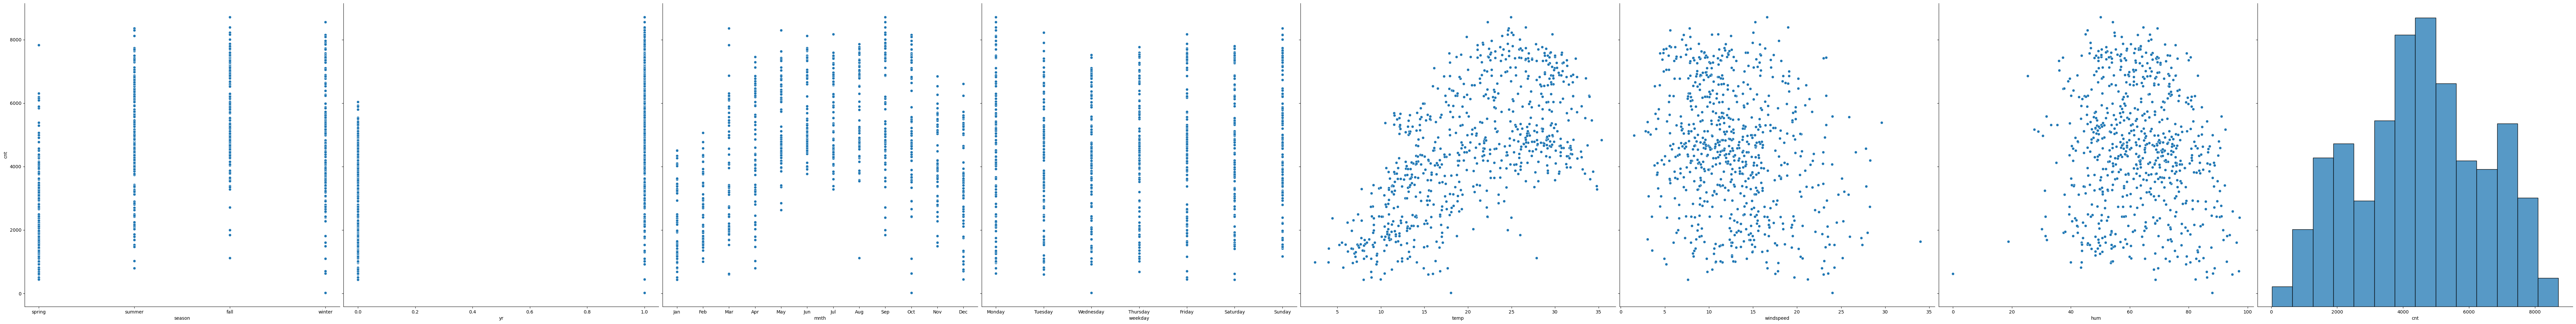

In [963]:
sns.pairplot(bikerent, x_vars=['season', 'yr', 'mnth', 'weekday', 'temp', 'windspeed', 'hum', 'cnt'], y_vars='cnt',height=10, aspect=1, kind='scatter')
plt.show()

In [931]:
bikerent.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,Jan,0,Monday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,Jan,0,Tuesday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


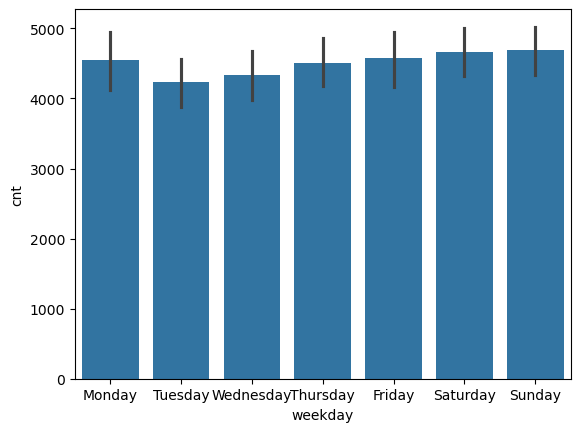

In [932]:
sns.barplot(data = bikerent, x = 'weekday', y = 'cnt')
plt.show()

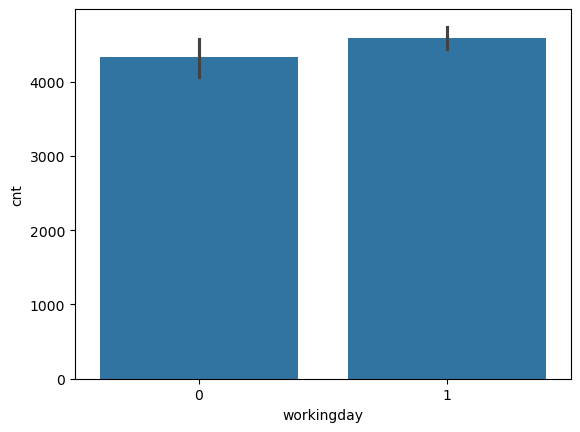

In [933]:
sns.barplot(data = bikerent, x = 'workingday', y = 'cnt')
plt.show()

In [934]:
# With above we infer that there isn't much difference in demand between workday and non workday 

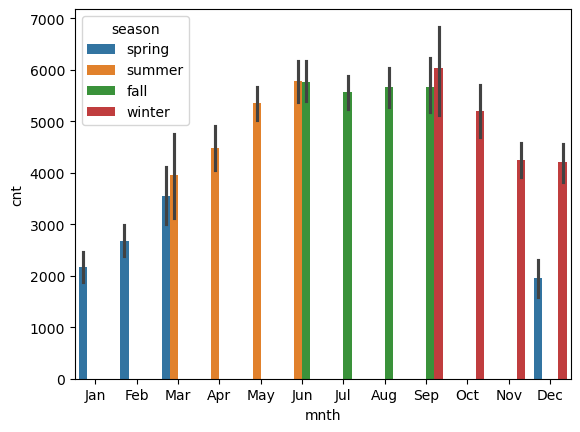

In [961]:
sns.barplot(data=bikerent, x= 'mnth', y = 'cnt', hue=bikerent['season'])
plt.show()

In [802]:
#Could infer that bookings were high in the mid of the year between Jun to Sep, could be related to weather condition

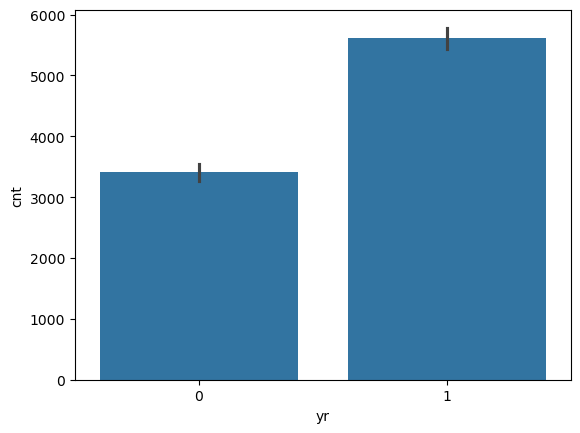

In [803]:
sns.barplot(data=bikerent, x= 'yr', y = 'cnt')
plt.show()

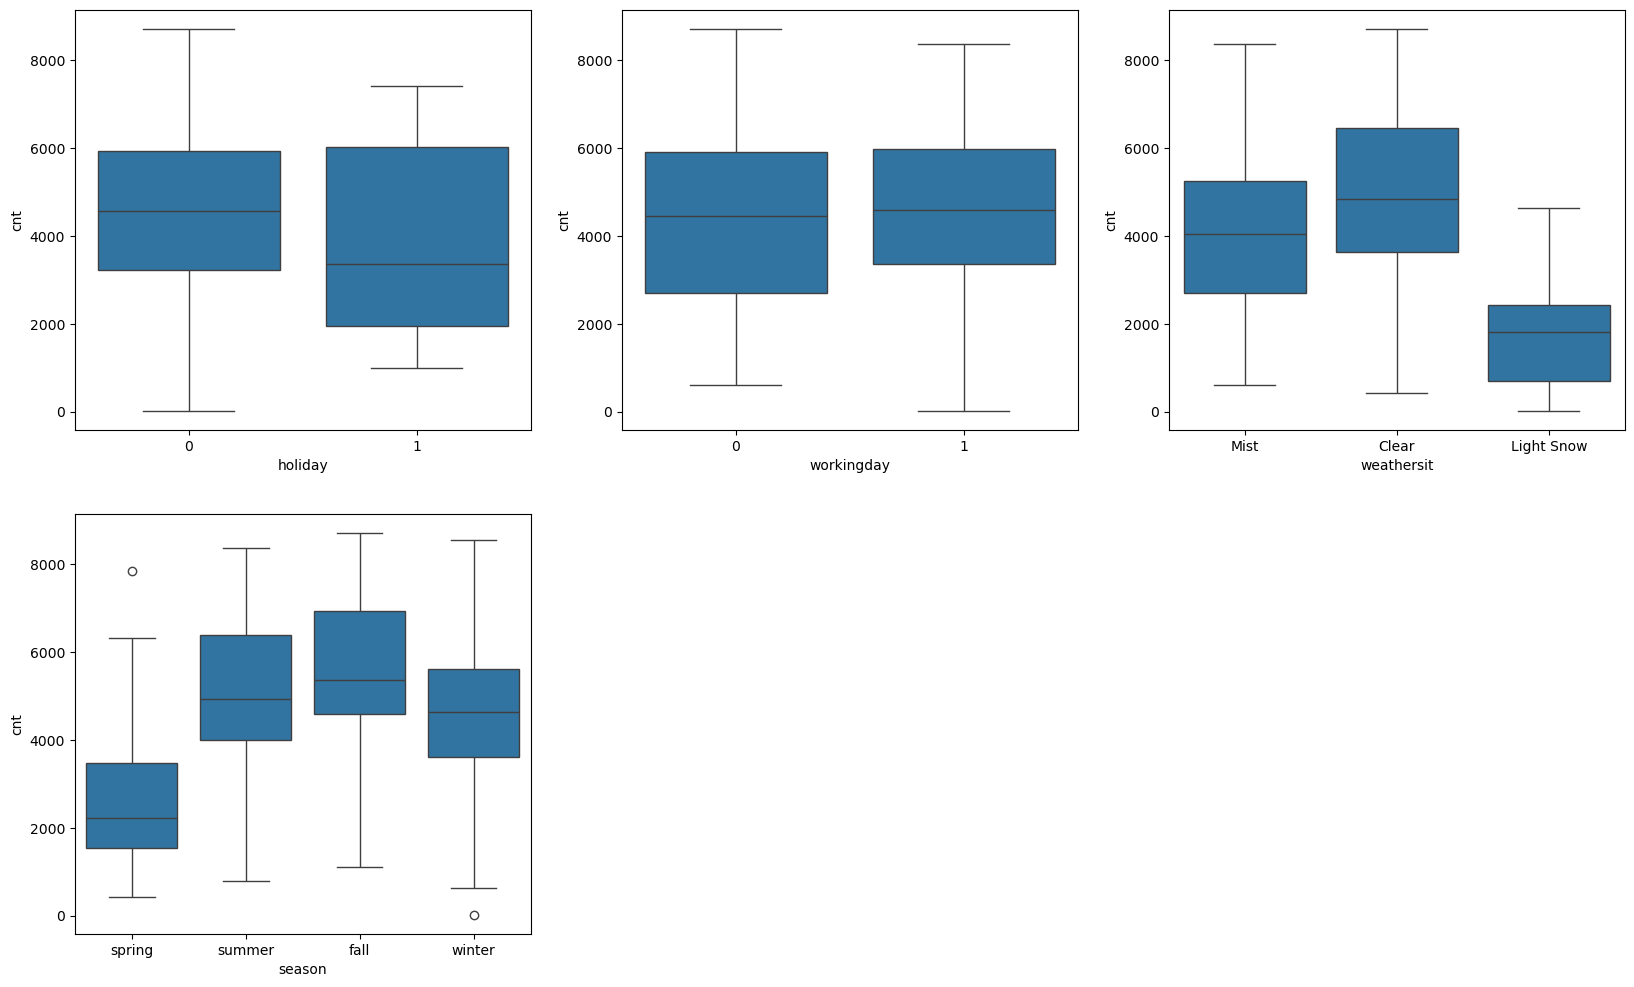

In [804]:
plt.figure(figsize=(20,12))
plt.subplot(2, 3, 1)
sns.boxplot(x='holiday', y = 'cnt', data =bikerent)
plt.subplot(2, 3, 2)
sns.boxplot(x='workingday', y = 'cnt', data =bikerent)
plt.subplot(2, 3, 3)
sns.boxplot(x='weathersit', y = 'cnt', data =bikerent)
plt.subplot(2, 3, 4)
sns.boxplot(x='season', y = 'cnt', data =bikerent)
plt.show()

## Encoding of categorical variables 
holiiday and working day are already encoded in 1 and 0 

Need to encode weather sit and season using dummy variables

In [806]:
season = pd.get_dummies(bikerent['season'], drop_first=True, dtype=int)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [807]:
bikerent = pd.concat([bikerent, season], axis=1)
bikerent.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,01-01-2018,spring,0,Jan,0,Monday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,02-01-2018,spring,0,Jan,0,Tuesday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,03-01-2018,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,04-01-2018,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,05-01-2018,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [808]:
weathersit = pd.get_dummies(bikerent.weathersit, drop_first=True, dtype=int)
weathersit.head()

,Light Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [809]:
bikerent = pd.concat([bikerent, weathersit], axis=1)
bikerent.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist
0,01-01-2018,spring,0,Jan,0,Monday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,02-01-2018,spring,0,Jan,0,Tuesday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,03-01-2018,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,04-01-2018,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,05-01-2018,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [810]:
#Get dummies for weekday
weekday = pd.get_dummies(bikerent.weekday, drop_first=True, dtype=int)
weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [811]:
bikerent = pd.concat([bikerent, weekday], axis=1)
bikerent.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,summer,winter,Light Snow,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,01-01-2018,spring,0,Jan,0,Monday,0,Mist,14.110847,18.18125,...,0,0,0,1,1,0,0,0,0,0
1,02-01-2018,spring,0,Jan,0,Tuesday,0,Mist,14.902598,17.68695,...,0,0,0,1,0,0,0,0,1,0
2,03-01-2018,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,...,0,0,0,0,0,0,0,0,0,1
3,04-01-2018,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,...,0,0,0,0,0,0,0,1,0,0
4,05-01-2018,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,...,0,0,0,0,0,0,0,0,0,0


In [812]:
#Get Dummies for Month categorical variable
month = pd.get_dummies(bikerent.mnth, drop_first=True, dtype=int)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [813]:
bikerent = pd.concat([bikerent, month], axis=1)
bikerent.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,01-01-2018,spring,0,Jan,0,Monday,0,Mist,14.110847,18.18125,...,0,0,1,0,0,0,0,0,0,0
1,02-01-2018,spring,0,Jan,0,Tuesday,0,Mist,14.902598,17.68695,...,0,0,1,0,0,0,0,0,0,0
2,03-01-2018,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,0
3,04-01-2018,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,...,0,0,1,0,0,0,0,0,0,0
4,05-01-2018,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,...,0,0,1,0,0,0,0,0,0,0


In [814]:
#Drop seaon and weathersit columns
bikerent.drop(columns=['season', 'weathersit', 'weekday', 'mnth'], axis=1 , inplace=True)
bikerent.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [815]:
# drop date column as we have week , month, day and year columns
bikerent.drop(columns=['dteday'], axis=1 , inplace=True)
bikerent.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [816]:
#drop atemp column as the data is same as temp column
bikerent.drop(columns=['atemp'], axis=1 , inplace=True)
bikerent.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [817]:
df_train, df_test = train_test_split(bikerent, train_size=0.7, random_state=100)
df_train.shape

(510, 29)

## Use minmax scaler to scale numerical columns as count is in 1000's while temperature is in range of 10's

In [819]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Light Snow', 'Mist', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [820]:
scaler = MinMaxScaler();
num_vars = ['temp', 'hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [821]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


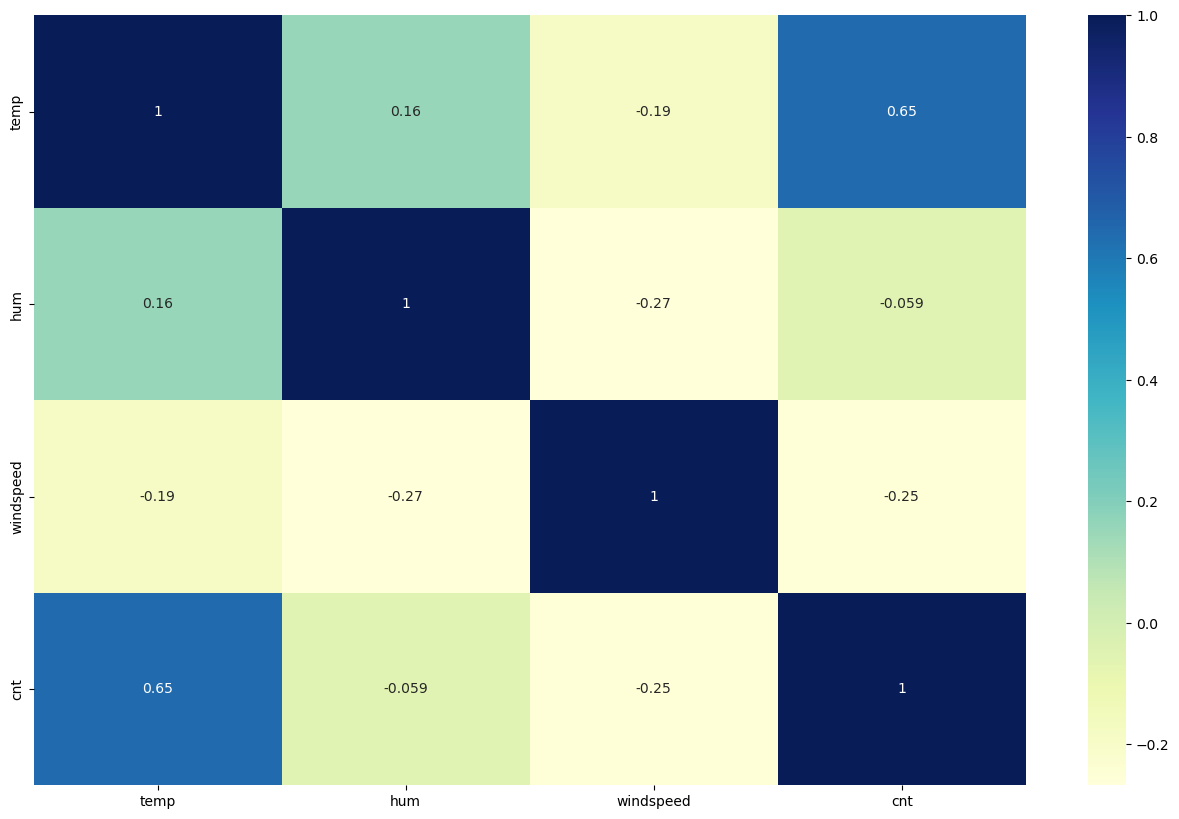

In [822]:
plt.figure(figsize= (16,10))
sns.heatmap(df_train[num_vars].corr(), annot=True, cmap="YlGnBu")
plt.show()

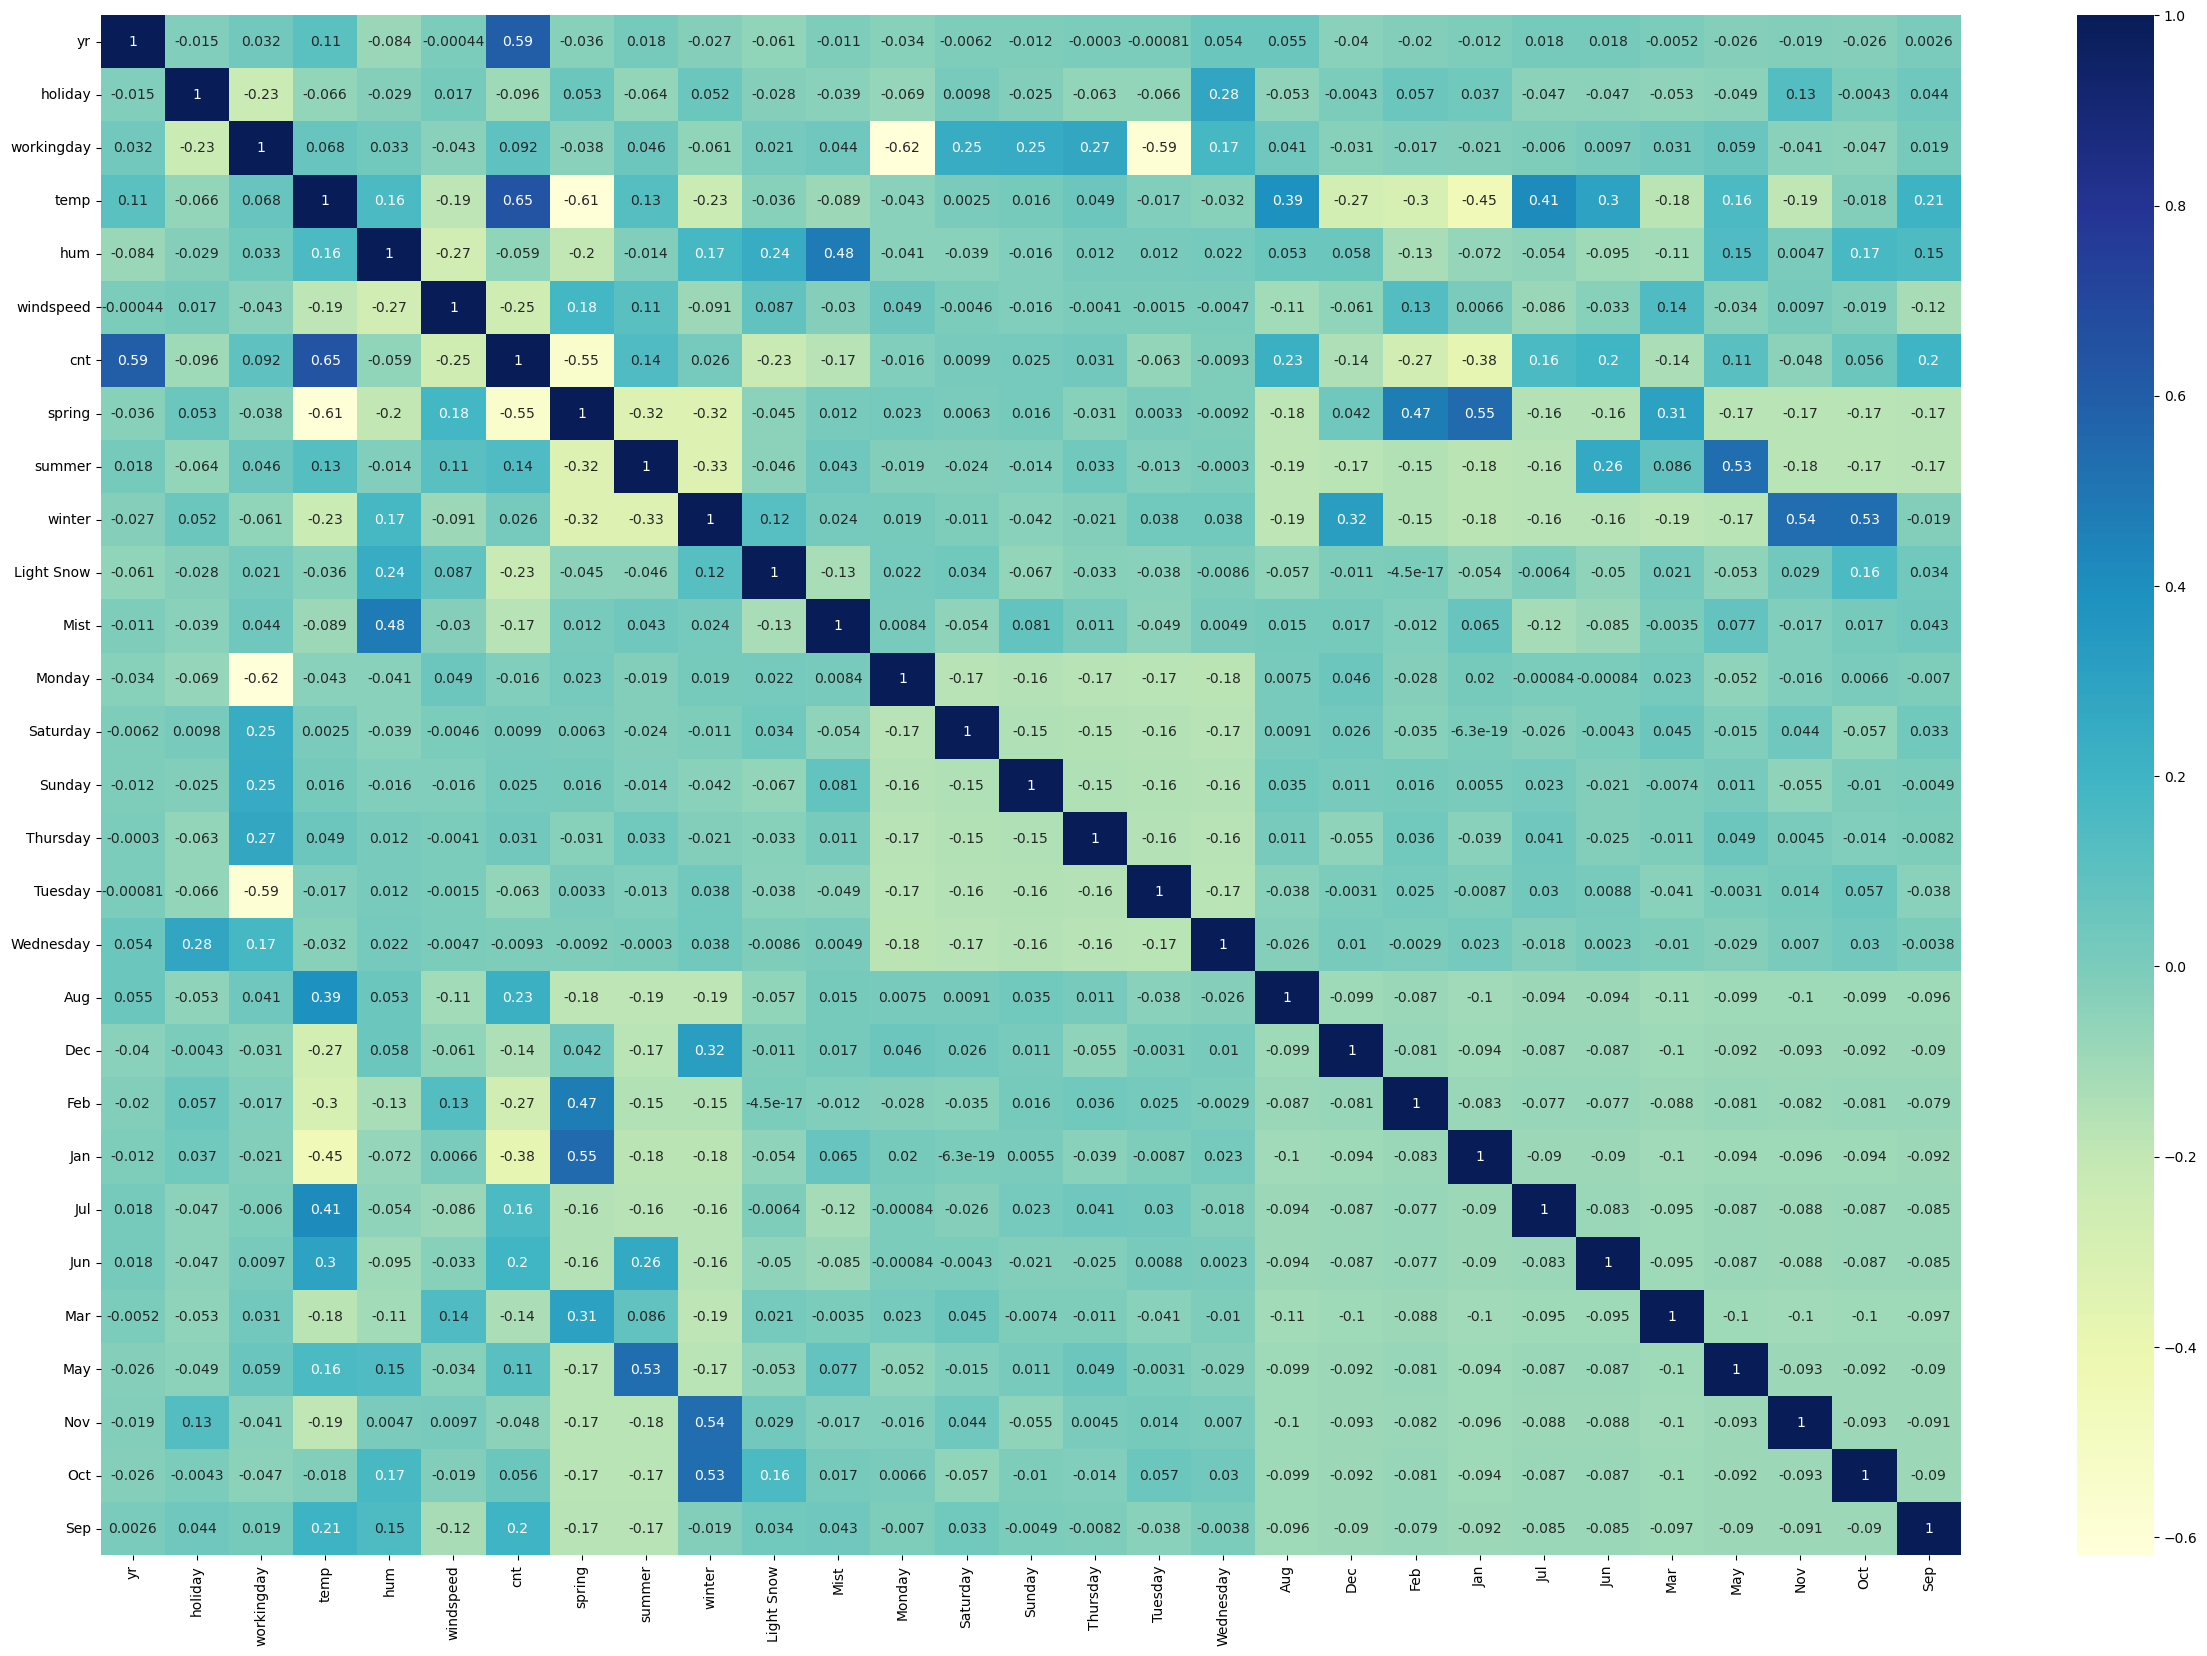

In [823]:
plt.figure(figsize= (30,20))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [824]:
y_train = df_train.pop('cnt')
X_train = df_train

In [825]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light Snow,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [826]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [827]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [828]:
rfe = RFE( estimator=lm, n_features_to_select=10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [829]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 17),
 ('winter', False, 18),
 ('Light Snow', True, 1),
 ('Mist', False, 5),
 ('Monday', True, 1),
 ('Saturday', False, 14),
 ('Sunday', False, 16),
 ('Thursday', False, 13),
 ('Tuesday', True, 1),
 ('Wednesday', False, 11),
 ('Aug', False, 10),
 ('Dec', False, 15),
 ('Feb', False, 7),
 ('Jan', False, 6),
 ('Jul', False, 2),
 ('Jun', False, 12),
 ('Mar', False, 19),
 ('May', False, 8),
 ('Nov', False, 9),
 ('Oct', False, 3),
 ('Sep', False, 4)]

In [830]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'Light Snow', 'Monday', 'Tuesday'],
      dtype='object')

In [831]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,Light Snow,Monday,Tuesday
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0


In [832]:
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,Light Snow,Monday,Tuesday
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,1
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,0,1,0
111,1.0,0,0,1,0.345824,0.751824,0.380981,0,0,0,0


In [833]:
lr = sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     239.2
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          7.11e-175
Time:                        18:18:22   Log-Likelihood:                 464.41
No. Observations:                 510   AIC:                            -908.8
Df Residuals:                     500   BIC:                            -866.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3293      0.024     13.474      0.000       0.281       0.377
yr             0.2318      0.009     26.286      0.000       0.214       0.249
holiday        0.0310      0.023      1.361      0.174      -0.014       0.076
workingday     0.1091      0.010     11.087      0.000       0.090       0.128
temp           0.3908      0.025     15.851      0.000       0.342       0.439
hum           -0.2145      0.033     -6.533      0.000      -0.279      -0.150
windspeed     -0.1978      0.027     -7.233      0.000      -0.251      -0.144
spring        -0.1551      0.013    -11.996      0.000      -0.181      -0.130
Light Snow    -0.2007      0.027     -7.414      0.000      -0.254      -0.148
Monday         0.1187      0.012      9.750      0.000       0.095       0.143
Tuesday        0.0705      0.013      5.593      0.000       0.046       0.095
==============================================================================
Omnibus:                       49.165   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.947
Skew:                          -0.587   Prob(JB):                     6.56e-21
Kurtosis:                       4.731   Cond. No.                     1.36e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.49e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [834]:
#Drop working day as it has too high VIF value
X_train_new = X_train_rfe.drop('holiday', axis = 1)
X_train_new.head()

,const,yr,workingday,temp,hum,windspeed,spring,Light Snow,Monday,Tuesday
576,1.0,1,1,0.815169,0.725633,0.264686,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,1,0
111,1.0,0,1,0.345824,0.751824,0.380981,0,0,0,0


In [835]:
lr = sm.OLS(y_train, X_train_new)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     239.2
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          7.11e-175
Time:                        18:18:22   Log-Likelihood:                 464.41
No. Observations:                 510   AIC:                            -908.8
Df Residuals:                     500   BIC:                            -866.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3603      0.040      9.043      0.000       0.282       0.439
yr             0.2318      0.009     26.286      0.000       0.214       0.249
workingday     0.0781      0.028      2.801      0.005       0.023       0.133
temp           0.3908      0.025     15.851      0.000       0.342       0.439
hum           -0.2145      0.033     -6.533      0.000      -0.279      -0.150
windspeed     -0.1978      0.027     -7.233      0.000      -0.251      -0.144
spring        -0.1551      0.013    -11.996      0.000      -0.181      -0.130
Light Snow    -0.2007      0.027     -7.414      0.000      -0.254      -0.148
Monday         0.0877      0.029      2.975      0.003       0.030       0.146
Tuesday        0.0395      0.030      1.333      0.183      -0.019       0.098
==============================================================================
Omnibus:                       49.165   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.947
Skew:                          -0.587   Prob(JB):                     6.56e-21
Kurtosis:                       4.731   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 2000x16000 with 0 Axes>

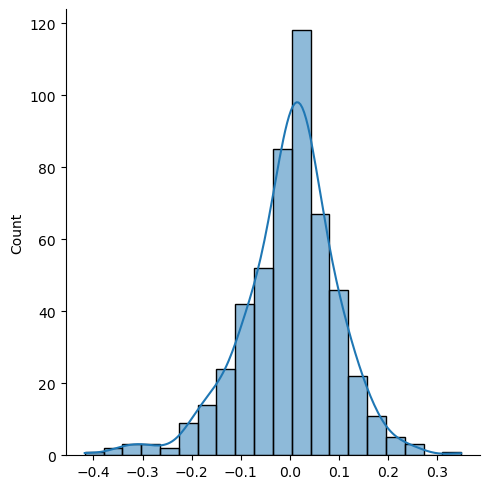

In [836]:
y_train_pred = lr_model.predict(X_train_new)
plt.figure(figsize=(20,160))
sns.displot(y_train-y_train_pred, bins = 20, kde = True)
plt.show()

In [837]:
num_vars = ['temp', 'hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [838]:
y_test = df_test.pop('cnt')
X_test = df_test

In [839]:
X_test_const = sm.add_constant(X_test)

In [840]:
X_test_new = X_test_const[X_train_new.columns]

In [841]:
y_test_pred = lr_model.predict(X_test_new)
r2_score(y_test, y_test_pred)

0.8018522851400387